# Lab 1: Introduction to Computer Vision with OpenCV

This lab will introduce you to basic image processing concepts using OpenCV. You will also set up your local environment for computer vision tasks and learn about submission guidelines and Git practices.

The objective of this lab is to:
- introduce image processing basics with OpenCV
- setup local EAI enviroment
- submission / *git*iquette


## Working on the server
### Making servers work

OpenCV is installed for all on Jupy/Lambdas.

In [ ]:
try:
    import cv2, numpy as np, matplotlib.pyplot as plt
except Exception as e:
    print("Installing dependencies...")
    import sys
    # Install the necessary libraries if they are not already present.
    not {sys.executable} -q -m pip install opencv-python-headless numpy matplotlib
    import cv2, numpy as np, matplotlib.pyplot as plt

# Print the OpenCV version to confirm it's installed.
print("OpenCV:", cv2.__version__)

OpenCV: 4.12.0


In [ ]:
#prefer 4.0 or higher
cv2.__version__

'4.12.0'

In [ ]:
import numpy as np

In [ ]:
#user friendly utility functions for CV:
import imutils

In [ ]:
#Read an img:
# img = cv2.imread('/home/memo/public/fake_news.jpg',0) #last param?

import urllib.request
IMG_PATH = "sample.jpg"

# !pip install gdown
import gdown

url="https://drive.google.com/file/d/1QvBVIDkjUH0OxnktyHfd9-UtL7Rky_KG/view?usp=sharing"
gdown.download(url, IMG_PATH, quiet=False,fuzzy=True)
print("Downloaded", IMG_PATH)

img = cv2.imread(IMG_PATH)


Downloading...
From: https://drive.google.com/uc?id=1QvBVIDkjUH0OxnktyHfd9-UtL7Rky_KG
To: /content/sample.jpg
100%|██████████| 448k/448k [00:00<00:00, 6.68MB/s]

Downloaded sample.jpg


In [ ]:
img.shape
#what type is img? what is 3?

(3010, 4000, 3)

In [ ]:
#Display image:
#below is how we would usually do it, but won't work on a server
# should work on your PC:
# cv2.imshow('headline', img)
#work around:

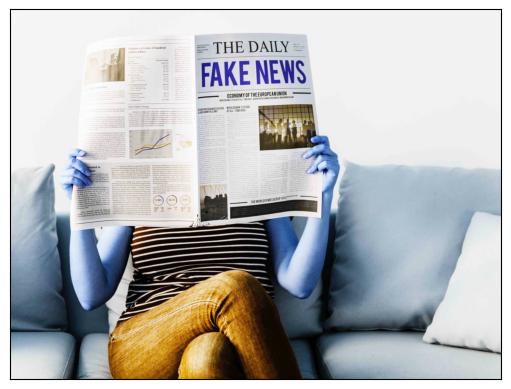

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(img)
# plt.imshow(imutils.opencv2matplotlib(img)) #BGR vs RGB
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## Edge Detection

[Intro to edge detection](https://docs.opencv.org/trunk/da/d22/tutorial_py_canny.html) on OpenCV site.

[Wiki example](https://en.wikipedia.org/wiki/Canny_edge_detector#/media/File:%C3%84%C3%A4retuvastuse_n%C3%A4ide.png)

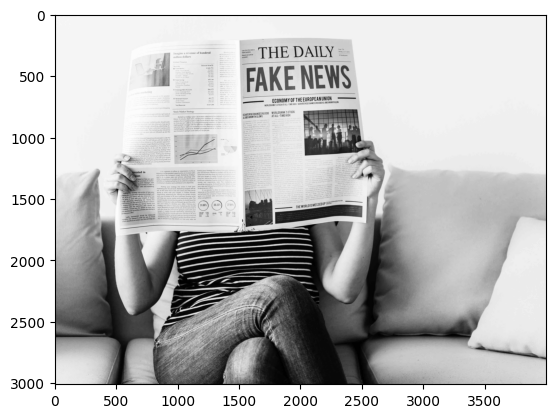

In [ ]:
img_gray = cv2.imread(IMG_PATH,0)
#Canny Edge Detection
edgeMap = cv2.Canny(img_gray, 10, 20) #min/max edge gradient threshold
#orig
plt.imshow(imutils.opencv2matplotlib(img_gray))
#edgemap
# plt.imshow(imutils.opencv2matplotlib(edgeMap))


In [ ]:
#example from imutils
# https://github.com/jrosebr1/imutils/blob/master/demos/perspective_transform.py

# load the notecard code image, clone it, and initialize the 4 points
# that correspond to the 4 corners of the notecard
# receipt
# https://drive.google.com/file/d/1tSo87CXctF2_5ZFyVakDDOdpbeOXy6b4/view?usp=sharing
# notecard
urln = 'https://drive.google.com/file/d/1Dz3Kv4k5ybDgVKPibf3F0jOvCLjcO4uS/view?usp=sharing'

IMG_PATHn = "notecard.png"
gdown.download(urln, IMG_PATHn, quiet=False,fuzzy=True)
print("\n Downloaded", IMG_PATHn)
imgn = cv2.imread(IMG_PATHn)
notecard = imgn
clone = notecard.copy()


Downloading...
From: https://drive.google.com/uc?id=1Dz3Kv4k5ybDgVKPibf3F0jOvCLjcO4uS
To: /content/notecard.png
100%|██████████| 304k/304k [00:00<00:00, 4.94MB/s]


 Downloaded notecard.png


In [ ]:
from imutils import perspective

#Drawing functions: circle, line, ellipse, putText

#mark the edges of the notecard
pts = np.array([(73, 239), (356, 117), (475, 265), (187, 443)])

# loop over the points and draw them on the cloned image
for (x, y) in pts:
    cv2.circle(clone, (x, y), 10, (0, 255, 0), -1)


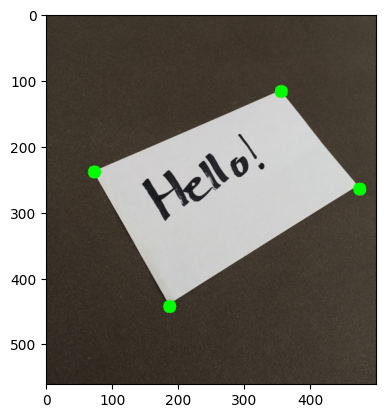

In [ ]:
# show the original
plt.imshow(imutils.opencv2matplotlib(clone))


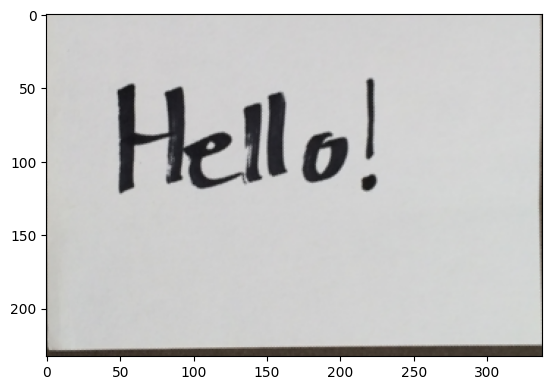

In [ ]:
# apply the four point tranform to obtain a "birds eye view" of
# the notecard
warped = perspective.four_point_transform(notecard, pts)
# show the warped image
plt.imshow(imutils.opencv2matplotlib(warped))


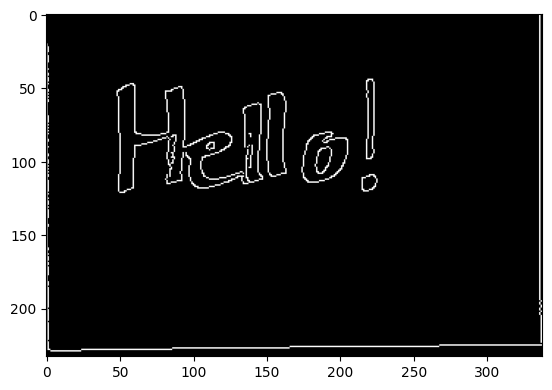

In [ ]:
#Manual edge detection: lower/higher thereshold
target = warped #clone vs warped vs img_gray
#Manual edge detection
edgeMap = cv2.Canny(target, 20, 200)
#Automatic Canny Edge Detection
# edgeMap = imutils.auto_canny(target)

#edgemap
plt.imshow(imutils.opencv2matplotlib(edgeMap))


[you can now build a document scanner](https://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/)

## Set up your PC

Not everything we need can be done on Jupy.

### Install python
Win: bashonwindows or other work arounds;   
	- Ubuntu: https://www.liquidweb.com/kb/how-to-setup-a-python-virtual-environment-on-windows-10/.  
	- Homebrew-like: https://docs.python-guide.org/starting/install3/win/.   
Mac: https://docs.python-guide.org/dev/virtualenvs/.   

### Install CV2:
Install OpenCV 4 in a virual env:
```
$ pip install virtualenv
#make your virtual life eaiser with some optional commands:
#windows:
$ pip install virtualenvwrapper-win
#others:
$ pip install virtualenvwrapper
#get your editor/nano: ~/.bashrc and append:
	# virtualenv and virtualenvwrapper
	export WORKON_HOME=$HOME/.virtualenvs
	#if ubuntu:
	export VIRTUALENVWRAPPER_PYTHON=/usr/bin/python3
	#if Mac:
	export VIRTUALENVWRAPPER_PYTHON=/usr/local/bin/python3
	#In Windows, the default path for WORKON_HOME is %USERPROFILE%Envs
	source /usr/local/bin/virtualenvwrapper.sh
$ source ~/.bashrc
```

### Create an env for cv and install
```
$ mkvirtualenv cv -p python3
$ pip install opencv-contrib-python
#super user friendly utility functions for CV:
$ pip install imutils argparse
```


### How to use venv?
- workon : Activate/switch to a virtual environment. Remember, you can have as many environments as you’d like.
- deactivate: Jumps out of a virtual environment and you’ll be working with your system.
- rmvirtualenv : Deletes a virtual environment.



### Test installation
```
$ workon cv
$ python
Python 3.6.3 (default, Oct 4 2017, 06:09:15)
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)] on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> import cv2
>>> cv2.__version__
'4.0.1'
>>> import imutils
>>>
```

## How to push to git?

It is hard for others to reproduce your code as different versions of libraries are constantly being released.

Be nice to your future-self
`$ pip freeze > requirements.txt`

Then, others can re-create your env via:
`$ pip install -r requirements.txt`

Note: as you update your libraries, conflicts may arise with this method.

I don't know a perfect solution.

## Exercises:

1. try `cv2.imshow()`:
    - in your PC, instead of plt.imshow()
    - Save if 's' pressed
    - Quit if 'q' pressed
    - Rotate left/right using arrow keys or similar
    - Add [text to image](https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html#puttext) and save it.
    - [Hint](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html)
1. fix `plt.imshow()`: use numpy swapping to display 'correct' image color (BGR vs RGB)
1. [you can now build a document scanner](https://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/)

## More-Exercises

1. **Brightness & Contrast**  
   Write a function `adjust_brightness_contrast(img, alpha, beta)` that applies `new = alpha*img + beta` (clip to [0,255]). Try values like `alpha=1.2, beta=15` and visualize.

2. **Compare Interpolations**  
   Resize your image by 0.25× and 2× using `INTER_NEAREST`, `INTER_LINEAR`, and `INTER_CUBIC`. What artifacts do you see?

3. **Edge Tuning**  
   Sweep Canny thresholds (e.g., 50–150, 100–200, 150–300). Which pair best outlines your subject?

4. **Morphology for Noise**  
   Add salt & pepper noise to a grayscale image; use opening/closing to denoise. Report a PSNR or simple error metric.

5. **Challenge (Optional)**  
   Count coins (or round objects) in a photo using thresholding + morphology + contours. Show your steps and the final count.

## Submission

- Finish exercises
- Create a repo on your favorite git (hub, lab, etc.)
    - call it EAI
    - this can go under lab1 folder in EAI
    - can be private
    - add me ('ergezerm@wit.edu' or 'memoatwit')
    - push code
    - add Readme.md with link to results
        - can be a capture uploaded to youtube or similar
        - 60 sec cap
    - add `$ pip freeze > requirements.txt`

In [ ]:
# Starters

import numpy as np, cv2

def adjust_brightness_contrast(img_rgb: np.ndarray, alpha: float=1.0, beta: float=0.0):
    out = np.clip(alpha*img_rgb + beta, 0, 255).astype(np.uint8)
    return out

# Try it:
# imshow(adjust_brightness_contrast(img_rgb, 1.2, 15), "Brighter / Higher Contrast")

# Interpolation comparison:
# small_nn  = cv2.resize(img_rgb, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_NEAREST)
# small_lin = cv2.resize(img_rgb, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_LINEAR)
# small_cub = cv2.resize(img_rgb, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_CUBIC)
# imshow(small_nn, "Nearest"); imshow(small_lin, "Linear"); imshow(small_cub, "Cubic")

# Canny sweep:
# for lo, hi in [(50,150), (100,200), (150,300)]:
#     imshow(cv2.Canny(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY), lo, hi), f"Canny {lo}-{hi}")